In [15]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_csv('./Gia SMP va SMPcap 2021.csv',encoding = 'ISO-8859-1')

# Display the first few rows of the dataset
data.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1/1/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,1/2/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,1/3/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,1/4/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,1/5/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [3]:
data.isnull().sum()

Ngày    0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ngày    365 non-null    object 
 1   1       365 non-null    float64
 2   2       365 non-null    float64
 3   3       365 non-null    float64
 4   4       365 non-null    float64
 5   5       365 non-null    float64
 6   6       365 non-null    float64
 7   7       365 non-null    float64
 8   8       365 non-null    float64
 9   9       365 non-null    float64
 10  10      365 non-null    float64
 11  11      365 non-null    float64
 12  12      365 non-null    float64
 13  13      365 non-null    float64
 14  14      365 non-null    float64
 15  15      365 non-null    float64
 16  16      365 non-null    float64
 17  17      365 non-null    float64
 18  18      365 non-null    float64
 19  19      365 non-null    float64
 20  20      365 non-null    float64
 21  21      365 non-null    float64
 22  22

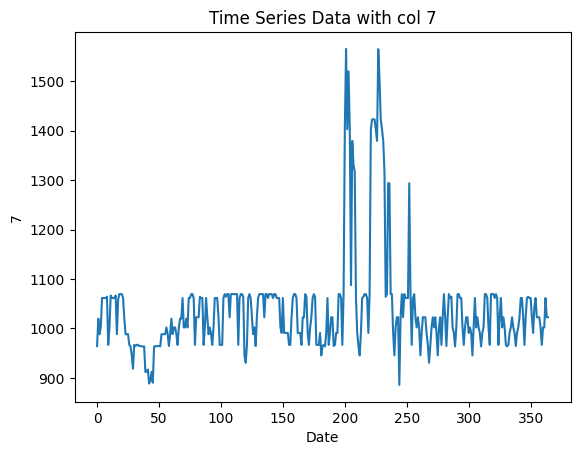

In [38]:
data.set_index('Ngày')
plt.plot(data.index,data['7'])
plt.title('Time Series Data with col 7')
plt.xlabel('Date')
plt.ylabel('7')
plt.show()

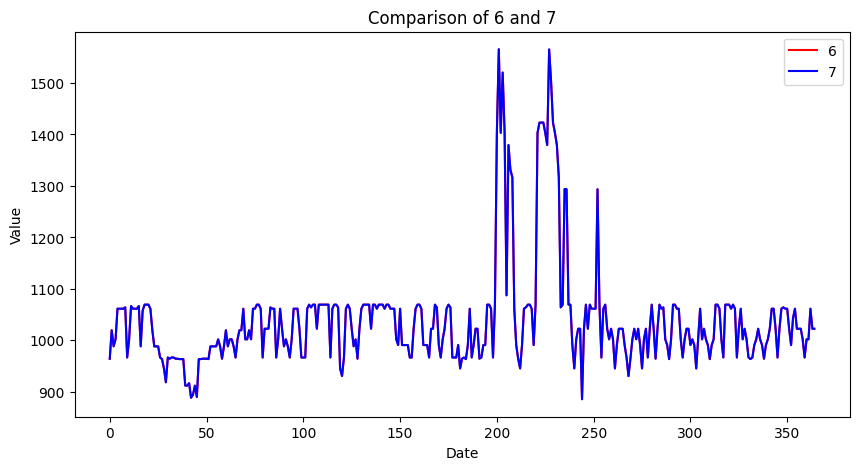

In [39]:
plt.figure(figsize=(10,5))
plt.plot(data['6'],color = 'red',label = '6')
plt.plot(data['7'],color = 'blue',label = '7')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of 6 and 7')
plt.legend()
plt.show()

In [40]:
d = ['6','7']

In [41]:
transformer = PowerTransformer()
X=transformer.fit_transform(data[d])

In [42]:
pca = PCA(n_components=2,random_state=1)
pca.fit(X)
PCA_ds = pd.DataFrame(pca.transform(data[d]), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,365.0,-1195.567723,120.848649,-1799.278921,-1220.015698,-1175.306691,-1135.999544,-1017.963169
col2,365.0,-857.186692,86.644667,-1290.029404,-874.714923,-842.659897,-814.477843,-729.849277


In [43]:
BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)

#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= preds

In [44]:
pp=BGM.predict_proba(X)# Calcualting the probabilities of each prediction
df_new=pd.DataFrame(X,columns=d) 
df_new[[f'predict_proba_{i}' for i in range(7)]]=pp # creating new dataframe columns of probabilites 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(7):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.68)].index
    train_index = np.concatenate((train_index, n_inx))

In [45]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][d]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(11)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = d)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = d)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model)

[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15


In [46]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[d])

In [47]:
labels=np.argmax(lgb_preds,axis=1)

In [48]:
print('ADF Statistic : %f' %adfuller(data['6'])[0])
print('p-values: %f'%adfuller(data['6'])[1])

ADF Statistic : -2.784767
p-values: 0.060483


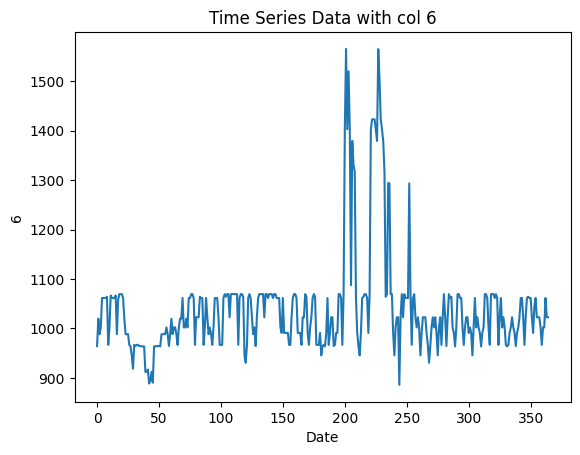

In [53]:
data.set_index('Ngày')
plt.plot(data.index,data['6'])
plt.title('Time Series Data with col 6')
plt.xlabel('Date')
plt.ylabel('6')
plt.show()

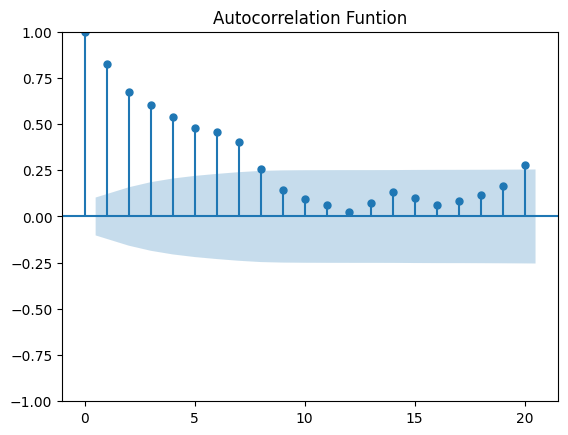

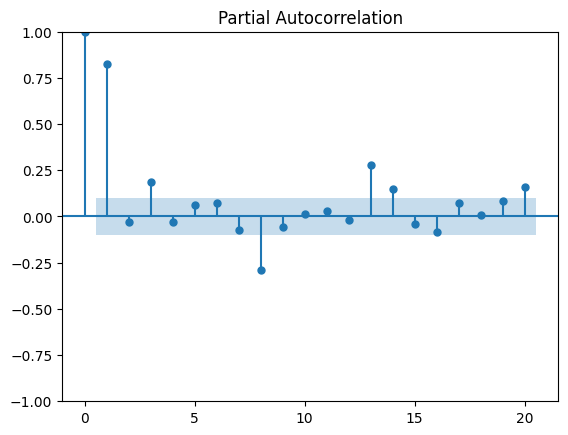

In [49]:
plot_acf(data['6'],lags =20)
plt.title('Autocorrelation Funtion')
plt.show()

plot_pacf(data['6'],lags =20)
plt.title('Partial Autocorrelation')
plt.show()

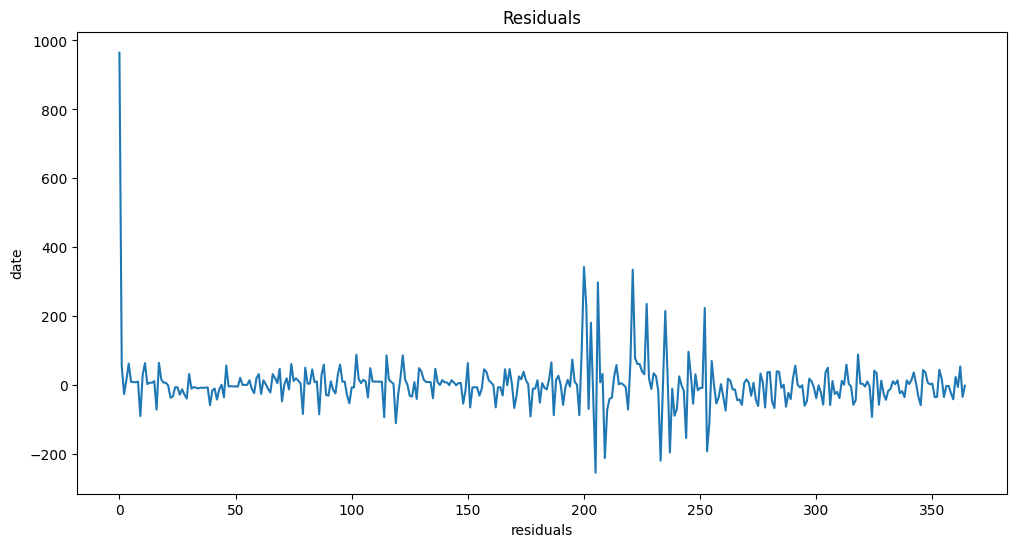

In [50]:
model = ARIMA(data['6'],order =(1,1,1))
model = model.fit()

plt.figure(figsize = (12,6))
residuals = model.resid
plt.plot(residuals)
plt.xlabel('residuals')
plt.ylabel('date')
plt.title('Residuals')
plt.show()

In [51]:
print('ADF Statistic : %f' %adfuller(residuals)[0])
print('p-values: %f'%adfuller(residuals)[1])

ADF Statistic : -5.259230
p-values: 0.000007


ValueError: x and y must have same first dimension, but have shapes (42,) and (1,)

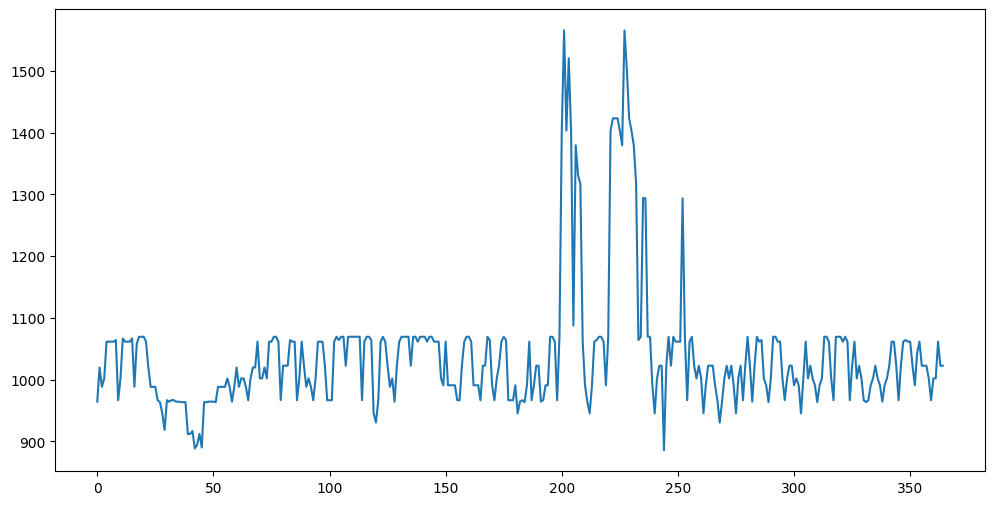

In [52]:
forecast,stderr, conf_int = model.forecast(steps = 3)
plt.figure(figsize=(12,6))
plt.plot(data.index,data['6'],label = 'Actual')
plt.plot(data.index[len(data)-42:],forecast,label = 'Forecast')
plt.title('6 Forecast')
plt.xlabel('Date')
plt.ylabel('6')
plt.legend()
plt.show()

In [54]:
print('ADF Statistic : %f' %adfuller(data['7'])[0])
print('p-values: %f'%adfuller(data['7'])[1])

ADF Statistic : -2.784757
p-values: 0.060484


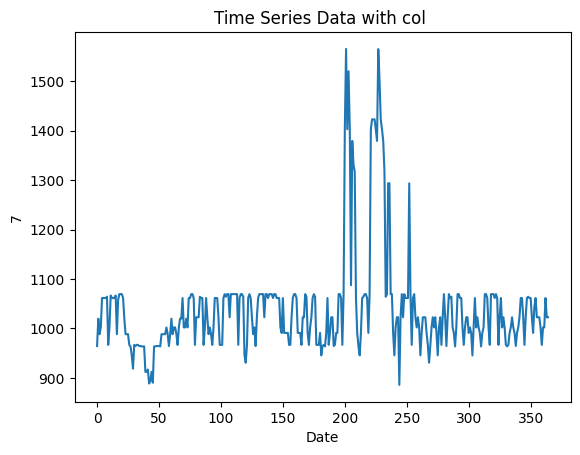

In [55]:
data.set_index('Ngày')
plt.plot(data.index,data['7'])
plt.title('Time Series Data with col ')
plt.xlabel('Date')
plt.ylabel('7')
plt.show()

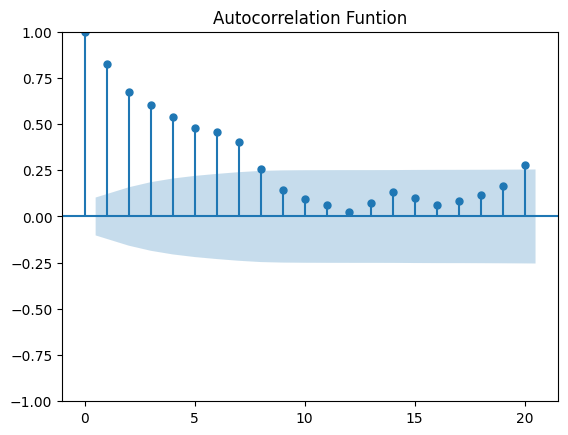

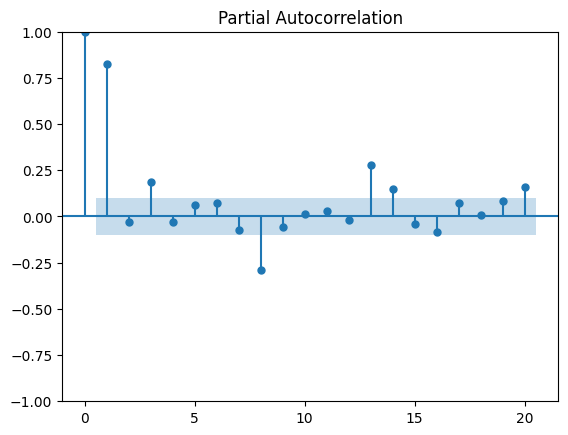

In [56]:
plot_acf(data['7'],lags =20)
plt.title('Autocorrelation Funtion')
plt.show()

plot_pacf(data['7'],lags =20)
plt.title('Partial Autocorrelation')
plt.show()

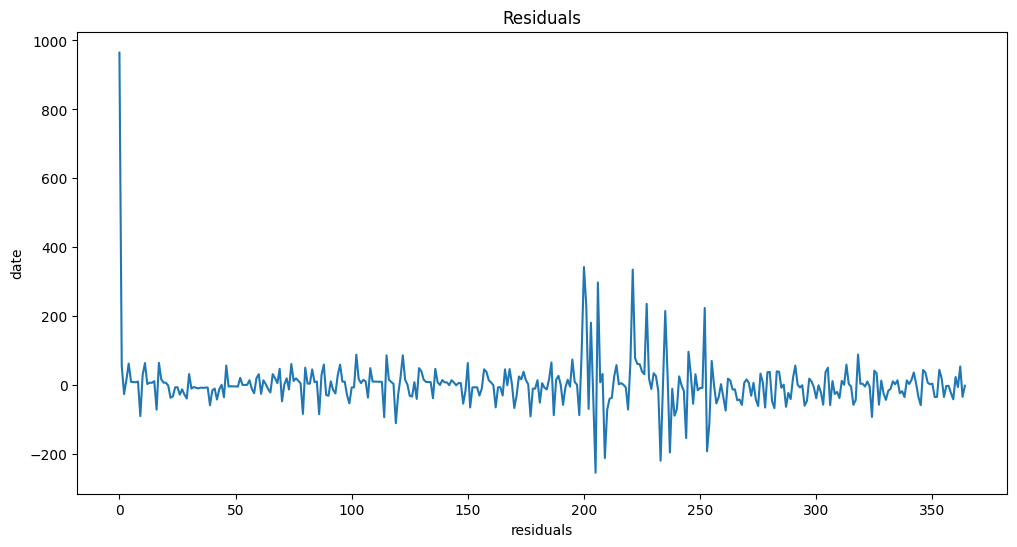

In [59]:
model = ARIMA(data['7'],order =(1,1,1))
model = model.fit()

plt.figure(figsize = (12,6))
residuals1 = model.resid
plt.plot(residuals)
plt.xlabel('residuals')
plt.ylabel('date')
plt.title('Residuals')
plt.show()

In [60]:
print('ADF Statistic : %f' %adfuller(residuals1)[0])
print('p-values: %f'%adfuller(residuals1)[1])

ADF Statistic : -5.259245
p-values: 0.000007
